In [2]:
import tensorflow as tf

In [4]:
from tensorflow import keras 
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [42]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [43]:
len(X_train)

60000

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_train[0].shape

(28, 28)

In [47]:
X_train=X_train/255

In [48]:
X_test=X_test/255

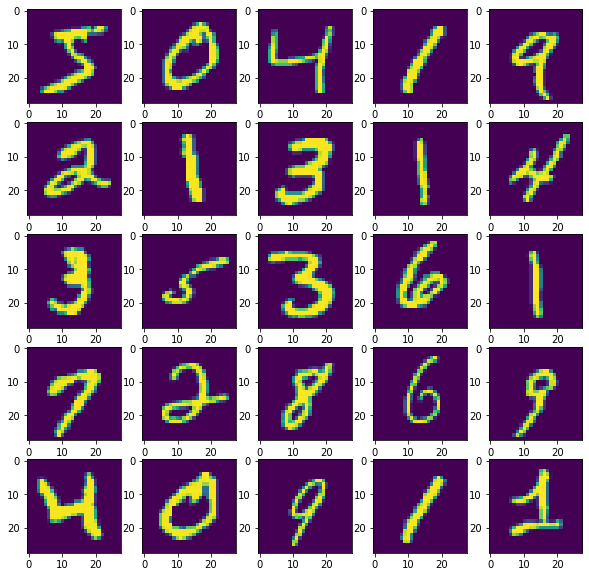

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)   
    plt.imshow(X_train[i])

plt.show()

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
X_train_faltten=X_train.reshape(len(X_train),28*28)

In [52]:
X_train_faltten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
X_test_faltten=X_test.reshape(len(X_test),28*28)

In [54]:
X_train_faltten.shape

(60000, 784)

In [55]:
X_test_faltten.shape

(10000, 784)

In [56]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [57]:
model.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
model.fit(X_train_faltten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.4744 - accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.3047 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.2735 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.2669 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.2618 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.2583 - accuracy: 0.9275
Epoch 8/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.2552 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.2525 - accuracy: 0.9304
Epoch 10/10
1875/1875 [==============================] - 2s 800u

In [59]:
model.evaluate(X_test_faltten,y_test)

313/313 [==============================] - 0s 724us/step - loss: 0.2624 - accuracy: 0.9281


[0.26236552000045776, 0.9280999898910522]

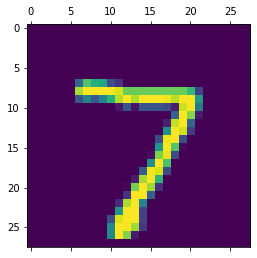

In [60]:
plt.matshow(X_test[0])

In [61]:
y_pred=model.predict(X_test_faltten)

313/313 [==============================] - 0s 603us/step


In [62]:
y_pred[0]

array([3.7349502e-03, 1.4359349e-08, 1.1744235e-02, 9.6602887e-01,
       1.2454434e-03, 1.1707144e-01, 1.8602593e-08, 9.9985158e-01,
       6.6845253e-02, 6.1303496e-01], dtype=float32)

In [63]:
np.argmax(y_pred[0])

7

In [64]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [66]:
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [68]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [71]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)

In [72]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    8,  925,   17,    7,    5,   11,   12,   40,    3],
       [   2,    0,   15,  929,    1,   23,    2,    9,   24,    5],
       [   1,    1,    5,    2,  918,    0,    9,    4,   11,   31],
       [   7,    2,    2,   37,    8,  786,   12,    6,   27,    5],
       [  11,    3,    8,    1,    7,   16,  908,    2,    2,    0],
       [   1,    6,   21,    5,    6,    1,    0,  953,    2,   33],
       [   6,    9,    6,   22,    9,   29,    9,   11,  866,    7],
       [  10,    8,    1,   12,   21,    6,    0,   23,    8,  920]])>

In [73]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

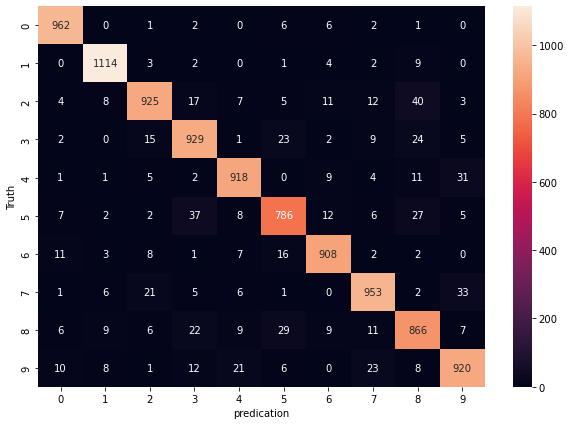

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predication')
plt.ylabel('Truth')